<a href="https://colab.research.google.com/github/Gopichand04/Hackthon_ds_easy/blob/main/Untitled20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/housing_prices.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
from scipy.stats import zscore
z=np.abs(zscore(df['area']))
df=df[(z<3)]

In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
col = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
for i in col:
    df[i] = encoder.fit_transform(df[i])
df.head()

<ipython-input-6-a4ca6f30dde2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = encoder.fit_transform(df[i])
<ipython-input-6-a4ca6f30dde2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = encoder.fit_transform(df[i])
<ipython-input-6-a4ca6f30dde2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [7]:
print(df.shape)

(538, 13)


In [8]:
df1=df.loc[:,df.dtypes!=object]
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [9]:
corr=df1.corr()
corr

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.542847,0.361667,0.516971,0.429030,0.296527,0.267378,0.187218,0.089275,0.460494,0.384803,0.329586,-0.304950
area,0.542847,1.000000,0.142157,0.198125,0.119742,0.301716,0.185003,0.063693,-0.035502,0.252659,0.363842,0.263945,-0.174039
bedrooms,0.361667,0.142157,1.000000,0.360605,0.410512,-0.014494,0.084177,0.108034,0.060522,0.166777,0.142804,0.077202,-0.131701
bathrooms,0.516971,0.198125,0.360605,1.000000,0.326225,0.041533,0.130208,0.111396,0.075459,0.197885,0.187312,0.063152,-0.154479
stories,0.429030,0.119742,0.410512,0.326225,1.000000,0.124549,0.041099,-0.175410,0.026409,0.295371,0.049742,0.039823,-0.108368
mainroad,0.296527,0.301716,-0.014494,0.041533,0.124549,1.000000,0.095028,0.045032,-0.014527,0.106527,0.203017,0.200946,-0.155997
guestroom,0.267378,0.185003,0.084177,0.130208,0.041099,0.095028,1.000000,0.373973,-0.007662,0.138833,0.042104,0.163060,-0.122563
basement,0.187218,0.063693,0.108034,0.111396,-0.175410,0.045032,0.373973,1.000000,-0.008133,0.044211,0.051606,0.227423,-0.108154
hotwaterheating,0.089275,-0.035502,0.060522,0.075459,0.026409,-0.014527,-0.007662,-0.008133,1.000000,-0.127501,0.068631,-0.055718,-0.021198
airconditioning,0.460494,0.252659,0.166777,0.197885,0.295371,0.106527,0.138833,0.044211,-0.127501,1.000000,0.155671,0.115042,-0.151081


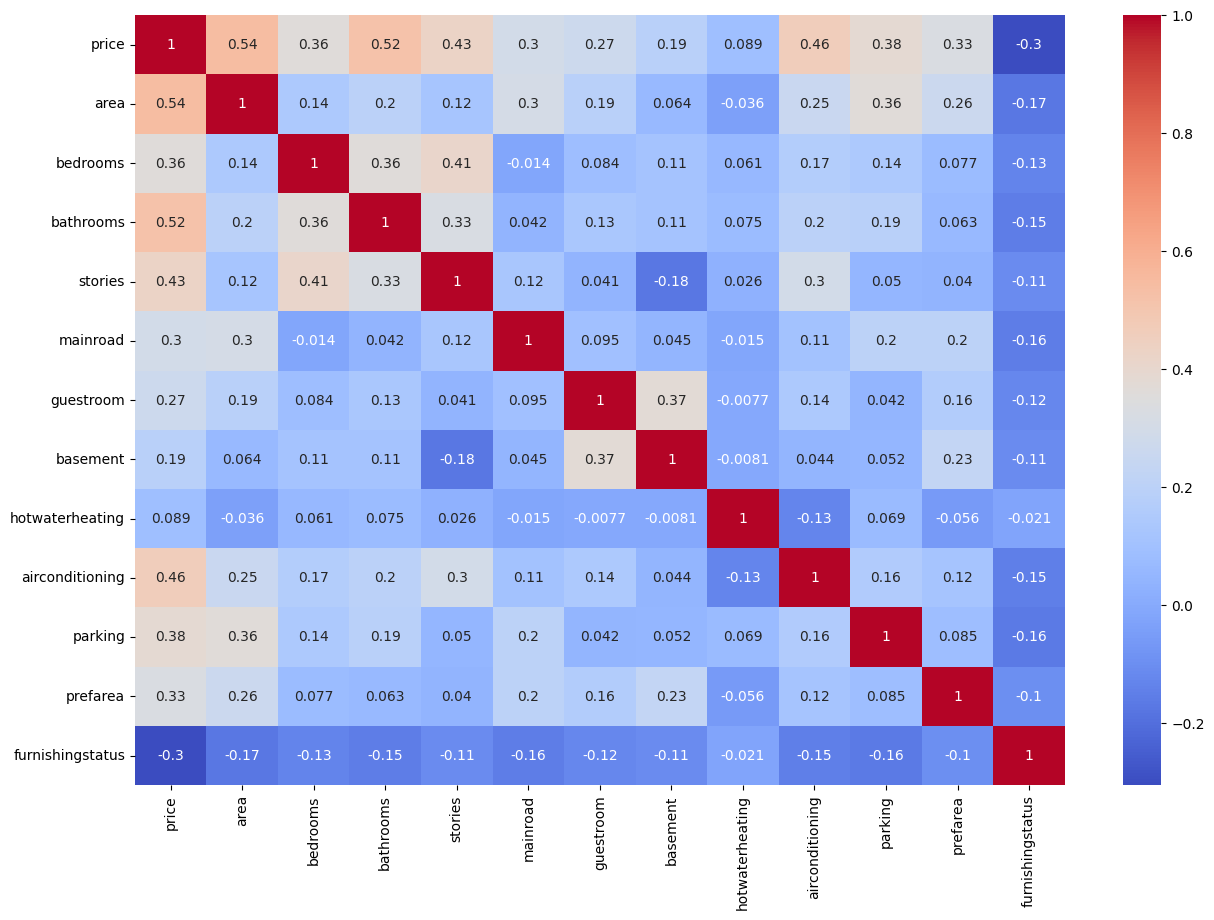

In [10]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(corr,cmap="coolwarm",annot=True)
plt.show()

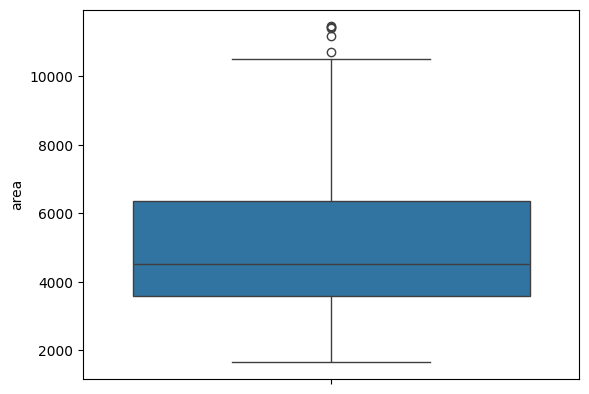

In [11]:
sns.boxplot(df['area'])
plt.show()

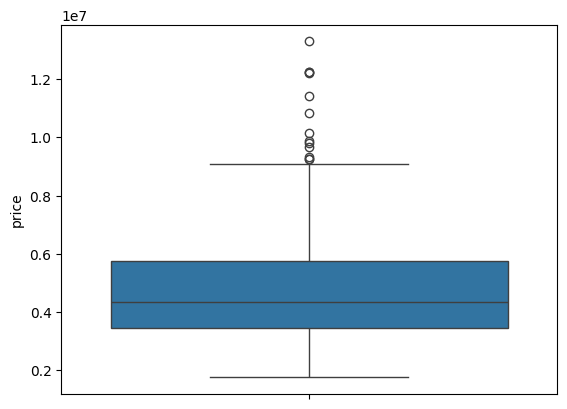

In [12]:
sns.boxplot(df['price'])
plt.show()

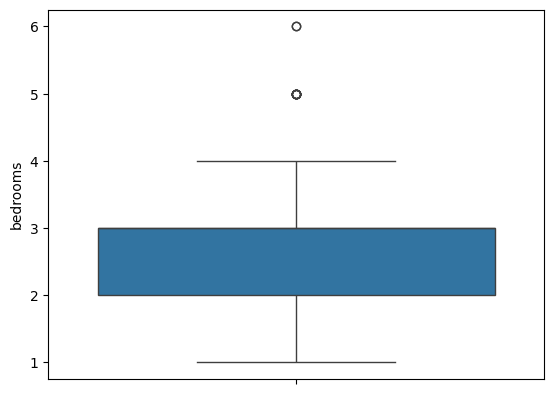

In [13]:
sns.boxplot(df['bedrooms'])
plt.show()

In [14]:
df1.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
col1 = [ 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating']
x = df[col1]
y = df['area']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
model = LinearRegression()
model.fit(x_train, y_train)
print(model.score(x_train,y_train))
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

0.2040595147077946
Mean Squared Error: 3853190.665280186
R^2 Score: 0.060818567118520184


In [16]:
from sklearn.ensemble import RandomForestRegressor
col1 = [ 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating']
x = df[col1]
y = df['area']
model = RandomForestRegressor()
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
y_pred=model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

0.3951540708250454
Mean Squared Error: 3760067.114986542
R^2 Score: 0.08351661582601522


In [17]:
from sklearn.tree import DecisionTreeRegressor
col1 = [ 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating']
x = df[col1]
y = df['area']
model = DecisionTreeRegressor()
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
y_pred=model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

0.4086442872554785
Mean Squared Error: 3970015.484805998
R^2 Score: 0.032343541891499905
